In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from plotly.tools import FigureFactory as FF
data=pd.read_csv('/flairty_clean_data.csv')
data

,index,Height(In),Weight(Lbs),Age(Years),Grip_strength(Kg),Frailty
0,0,65.8,112,30,30,1
1,1,71.5,136,19,31,1
2,2,69.4,153,45,29,1
3,3,68.2,142,22,28,0
4,4,67.8,144,29,24,0
5,5,68.7,123,50,26,1
6,6,69.8,141,51,22,0
7,7,70.1,136,23,20,0
8,8,67.9,112,17,19,1
9,9,66.8,120,39,31,1


In [5]:
height = np.array(data['Height(In)'])
weight = np.array(data['Weight(Lbs)'])
age = np.array(data['Age(Years)'])
grip_strength = np.array(data['Grip_strength(Kg)'])
frailty = np.array(data['Frailty'])

print("Descriptive Statistics:")
print("Height (Inches) - Mean:", np.mean(height))
print("Weight (Lbs) - Mean:", np.mean(weight))
print("Age (Years) - Mean:", np.mean(age))
print("Grip Strength (Kg) - Mean:", np.mean(grip_strength))


Descriptive Statistics:
Height (Inches) - Mean: 68.6
Weight (Lbs) - Mean: 131.9
Age (Years) - Mean: 32.5
Grip Strength (Kg) - Mean: 26.0


In [6]:
frailty_mean_weight = np.mean(weight[frailty == 1])
non_frailty_mean_weight = np.mean(weight[frailty == 0])
print("\nGroup-wise Comparison:")
print("Mean Weight for Frail individuals:", frailty_mean_weight)
print("Mean Weight for Non-Frail individuals:", non_frailty_mean_weight)


Group-wise Comparison:
Mean Weight for Frail individuals: 126.0
Mean Weight for Non-Frail individuals: 140.75


In [7]:
t_test_weight, p_value_weight = stats.ttest_ind(weight[frailty == 1], weight[frailty == 0])
print("\nT-Test Results for Weight:")
print("T-Statistic:", t_test_weight)
print("P-Value:", p_value_weight)


T-Test Results for Weight:
T-Statistic: -1.7920318220177764
P-Value: 0.11089488733773724


In [8]:

age_grip_strength_corr = np.corrcoef(age, grip_strength)[0, 1]
print("Correlation between Age and Grip Strength:", age_grip_strength_corr)

young_age_group = grip_strength[(age >= 18) & (age < 40)]
middle_age_group = grip_strength[(age >= 40) & (age < 60)]
elderly_age_group = grip_strength[age >= 60]

avg_grip_strength_young = np.mean(young_age_group)
avg_grip_strength_middle = np.mean(middle_age_group)
avg_grip_strength_elderly = np.mean(elderly_age_group)

print("\nGroup-wise Comparison of Grip Strength:")
print("Average Grip Strength (Young Adults):", avg_grip_strength_young)
print("Average Grip Strength (Middle-aged Adults):", avg_grip_strength_middle)
print("Average Grip Strength (Elderly Adults):", avg_grip_strength_elderly)


Correlation between Age and Grip Strength: 0.13375644238747394

Group-wise Comparison of Grip Strength:
Average Grip Strength (Young Adults): 27.333333333333332
Average Grip Strength (Middle-aged Adults): 25.666666666666668
Average Grip Strength (Elderly Adults): nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning:

invalid value encountered in double_scalars




Group-wise Comparison of Age with Frailty:
Average Age (Frail): 33.333333333333336
Average Age (Non-Frail): 31.25


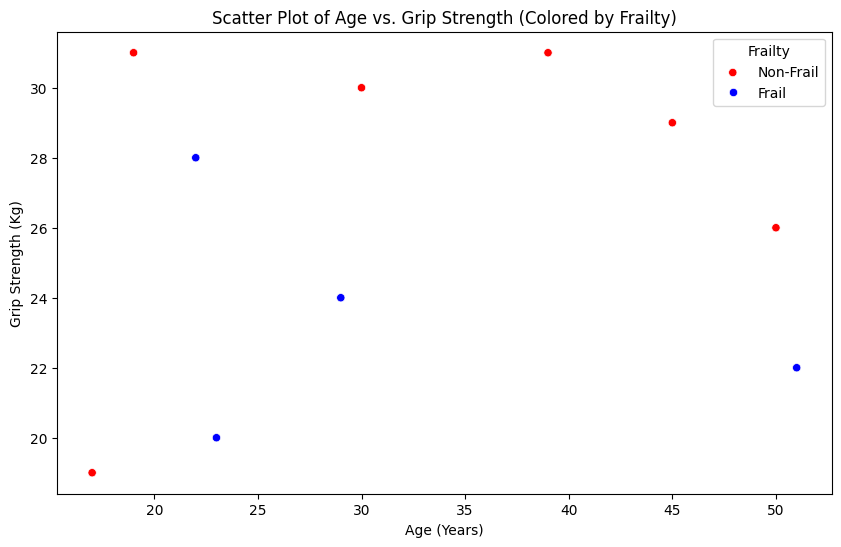

In [9]:
avg_age_frail = np.mean(age[frailty == 1])
avg_age_non_frail = np.mean(age[frailty == 0])

print("\nGroup-wise Comparison of Age with Frailty:")
print("Average Age (Frail):", avg_age_frail)
print("Average Age (Non-Frail):", avg_age_non_frail)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=age, y=grip_strength, hue=frailty, palette={0: 'blue', 1: 'red'})
plt.title('Scatter Plot of Age vs. Grip Strength (Colored by Frailty)')
plt.xlabel('Age (Years)')
plt.ylabel('Grip Strength (Kg)')
plt.legend(title='Frailty', labels=['Non-Frail', 'Frail'])
plt.show()
